In [1]:
import plotly
import numpy as np
import pandas as pd
import plotly.plotly as pyl
import plotly.graph_objs as go

from plotly import __version__
from scipy.spatial.distance import euclidean
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
%matplotlib inline

In [2]:
df_logs = pd.read_parquet("../data/logs.parquet")
df_loc = pd.read_parquet("../data/loc.parquet")
df_tops = pd.read_parquet("../data/tops.parquet")

In [3]:
df_logs.head()

,wellName,DEPTH,GR
1,512320698.0,421.0,96.9752
2,512320698.0,421.5,102.3324
3,512320698.0,422.0,104.6432
4,512320698.0,422.5,99.2187
5,512320698.0,423.0,92.0200


In [4]:
df_loc.sort_values('Latitude').tail()

,Latitude,Longitude
wellName,,
512323900.0,48.811163,2.088948
512326219.0,48.812023,2.102898
512326085.0,48.830383,2.241862
512335370.0,48.836473,2.121858
512324856.0,48.858803,2.178958


In [5]:
df_tops.head()

,MARCEL,CONRAD,SYLVAIN
wellName,,,
512320698.0,6398.0,6661.0,6638.0
512320699.0,6407.0,6676.0,6656.0
512320928.0,6520.0,6793.0,6746.0
512320970.0,6544.0,6816.0,6770.0
512320971.0,6510.0,6789.0,6742.0


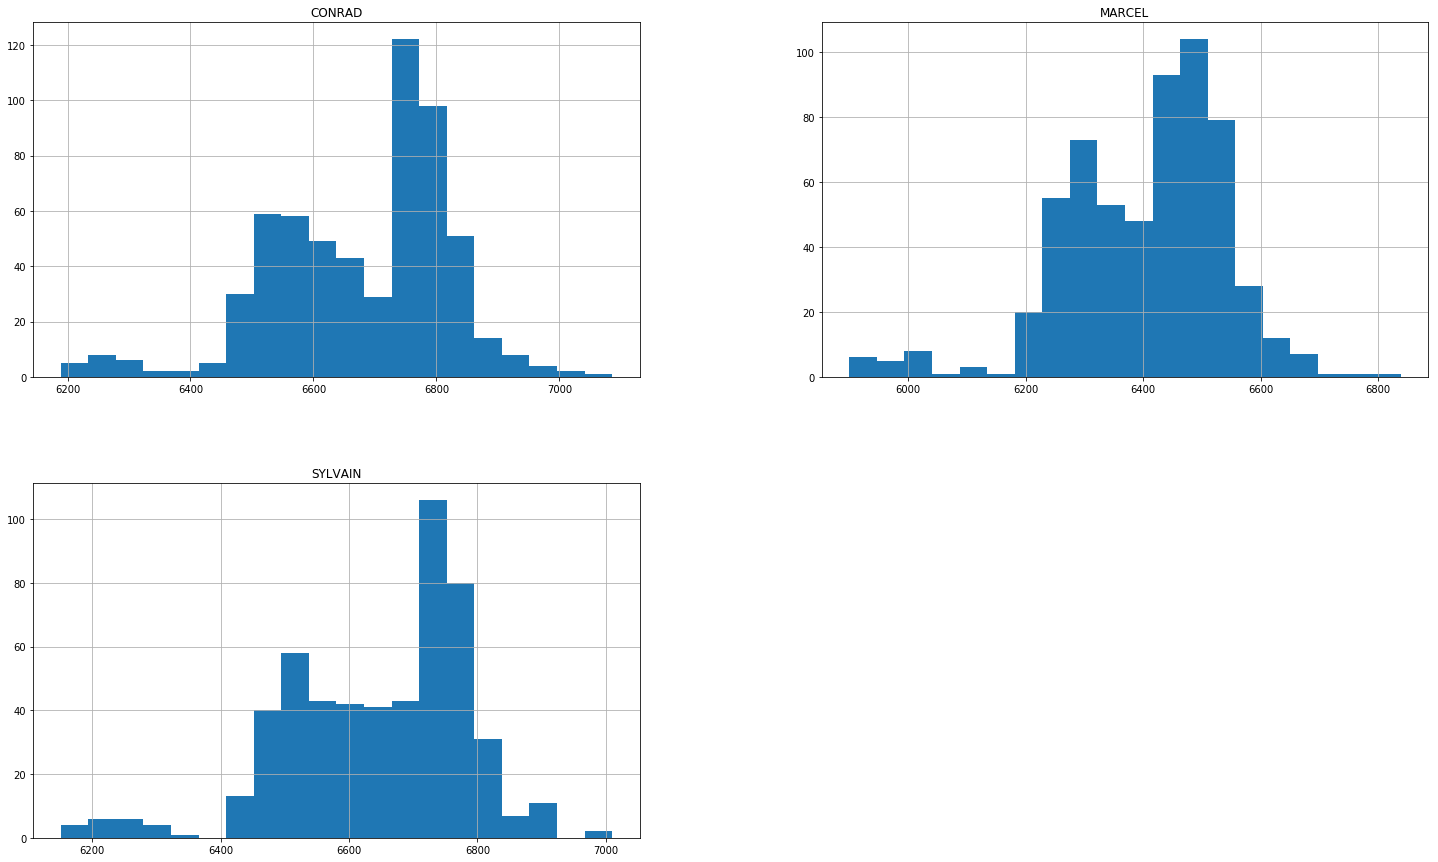

In [6]:
df_tops.hist(figsize=(25, 15), bins=20);

In [29]:
def get_nearest_wells(row, values=df_loc.dropna().values, nb_nodes=5):
    distances = [round(euclidean(row, well_loc), 5) for well_loc in df_loc.values]
    nearest_distances = sorted(distances)[1:nb_nodes + 1]
    nearest_wells = [df_loc.index[distances.index(value)] for value in nearest_distances]
    return nearest_wells

def get_furthest_wells(row, values=df_loc.dropna().values, nb_nodes=5):
    distances = [round(euclidean(row, well_loc), 5) for well_loc in df_loc.values]
    furthest_distances = sorted(distances, reverse=True)[:nb_nodes]
    furthest_wells = [df_loc.index[distances.index(value)] for value in furthest_distances]
    return furthest_wells

In [8]:
def prepare_data_set(df_loc, df_tops):
    well_data = df_loc.merge(df_tops[[top]], how='inner', left_index=True, right_index=True)
    well_data = well_data[well_data[top].notnull()]
    positions = well_data[["Latitude", "Longitude"]].values
    events = well_data[top].values
    
    return [np.array([np.array(pos), event]) for pos, event in zip (positions, events)]

In [30]:
well_name = 512321169.0
row = df_loc.loc[well_name]
row[:2]

Latitude     48.671523
Longitude     2.162318
Name: 512321169.0, dtype: float64

In [18]:
get_nearest_wells(row)

[512326521.0, 512322243.0, 512326526.0, 512326758.0, 512325609.0]

In [10]:
not any(np.isnan(x) for x in row)

True

In [12]:
# test_loc.head()

In [41]:
top = "SYLVAIN"
well_data = df_loc.merge(df_tops[[top]], how='inner', left_index=True, right_index=True)
well_data = well_data[well_data[top].notnull()]
test_loc = well_data.head(10)
test_loc[f'furthest_wells_{top}'] = test_loc.apply(lambda row: get_furthest_wells(row[['Latitude', 'Longitude']]), axis=1)
test_loc[f'nearest_wells_{top}'] = test_loc.apply(lambda row: get_nearest_wells(row[['Latitude', 'Longitude']]), axis=1)
test_loc.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Latitude,Longitude,SYLVAIN,furthest_wells_SYLVAIN,nearest_wells_SYLVAIN
wellName,,,,,
512320698.0,48.673353,2.145178,6638.0,"[512323914.0, 512323913.0, 512324305.0, 512323...","[512331361.0, 512325912.0, 512325911.0, 512323..."
512320699.0,48.673353,2.150808,6656.0,"[512323914.0, 512323913.0, 512324305.0, 512323...","[512325911.0, 512325913.0, 512326502.0, 512331..."
512320928.0,48.698713,2.140728,6746.0,"[512323914.0, 512323913.0, 512323777.0, 512323...","[512327191.0, 512325114.0, 512326384.0, 512326..."
512320970.0,48.713273,2.150148,6770.0,"[512323914.0, 512323913.0, 512323777.0, 512323...","[512320974.0, 512322948.0, 512322318.0, 512320..."
512320971.0,48.709603,2.145308,6742.0,"[512323914.0, 512323913.0, 512323777.0, 512323...","[512320974.0, 512326409.0, 512326385.0, 512320..."


In [43]:
well_name = 512320699
nearest_list = test_loc.loc[well_name][f'nearest_wells_{top}']
furthest_list = test_loc.loc[well_name][f'furthest_wells_{top}']
wellist = [well_name] + nearest_list[:2] + furthest_list[:2]

In [44]:
layout = go.Layout(
    height=120,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=20,
        t=0,
        pad=4
    )
)

def plot_pred(wellname, top_name, wsize):
    df_temp = df_logs[df_logs["wellName"]==wellname]

    true_top = df_tops.loc[wellname][top_name]
    if true_top > 0:
        ctr = df_temp[df_temp["DEPTH"]==true_top].index[0]
        true_log = df_temp.loc[ctr-wsize:ctr+wsize]

        bar = go.Bar( x = [true_top],y = [ df_temp["GR"].max()  ],name = top, width = 1)
        data = [go.Scatter(x=true_log.DEPTH,y=true_log.GR, name=wellname),bar]
  
        fig = go.Figure(data=data, layout=layout)
        iplot(fig)
    
for well in wellist:  
    plot_pred(well,top,100)